In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('titanic_toy.csv')
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [3]:
from sklearn.model_selection import train_test_split

x = df.drop(['Survived'],axis=1)
y = df[['Survived']]

x_train,x_test,y_train,y_test = train_test_split(x,y)
x_train.shape,x_test.shape

((668, 3), (223, 3))

In [4]:
x_train['age_99'] = x_train['Age'].fillna(99)
x_train['age_minus1'] = x_train['Age'].fillna(-1)

x_train['fare_999'] = x_train['Fare'].fillna(999)
x_train['fare_minus1'] = x_train['Fare'].fillna(-1)

In [5]:
x_train

,Age,Fare,Family,age_99,age_minus1,fare_999,fare_minus1
111,14.5,14.4542,1,14.5,14.5,14.4542,14.4542
222,51.0,8.0500,0,51.0,51.0,8.0500,8.0500
766,NaN,39.6000,0,99.0,-1.0,39.6000,39.6000
839,NaN,29.7000,0,99.0,-1.0,29.7000,29.7000
500,17.0,8.6625,0,17.0,17.0,8.6625,8.6625
...,...,...,...,...,...,...,...
635,28.0,13.0000,0,28.0,28.0,13.0000,13.0000
648,NaN,7.5500,0,99.0,-1.0,7.5500,7.5500
885,39.0,29.1250,5,39.0,39.0,29.1250,29.1250
703,25.0,7.7417,0,25.0,25.0,7.7417,7.7417


In [8]:
print("Age var : ",x_train['Age'].var())
print('age_99 var : ',x_train['age_99'].var())
print('age_minus1 var : ',x_train['age_minus1'].var())

print('Fare var : ',x_train['Fare'].var())
print("fare_999 var : ",x_train['fare_999'].var())
print('fare_minus1 var : ',x_train['fare_minus1'].var())

Age var :  204.64002976597467
age_99 var :  922.5095264334891
age_minus1 var :  313.3358288511428
Fare var :  2231.4267168684273
fare_999 var :  46185.46160073379
fare_minus1 var :  2169.346890573757


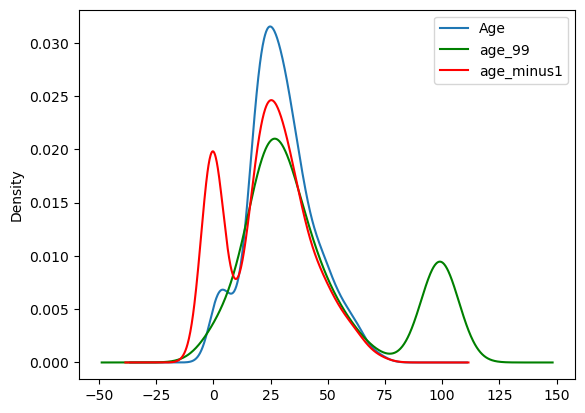

In [11]:
fig = plt.figure()
ax = fig.add_subplot()

# Age
x_train['Age'].plot(kind='kde')

# age_99
x_train['age_99'].plot(kind='kde',color='green')

# age_minus1
x_train['age_minus1'].plot(kind='kde',color='red')

plt.legend()

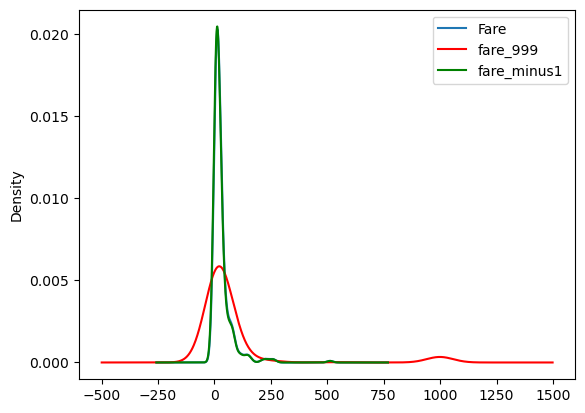

In [12]:
fig = plt.figure()
ax = fig.add_subplot()

# Fare
x_train['Fare'].plot(kind='kde')

# fare_999
x_train['fare_999'].plot(kind='kde',color='red')

# fare_minus1
x_train['fare_minus1'].plot(kind='kde',color='green')

plt.legend()


<Axes: >

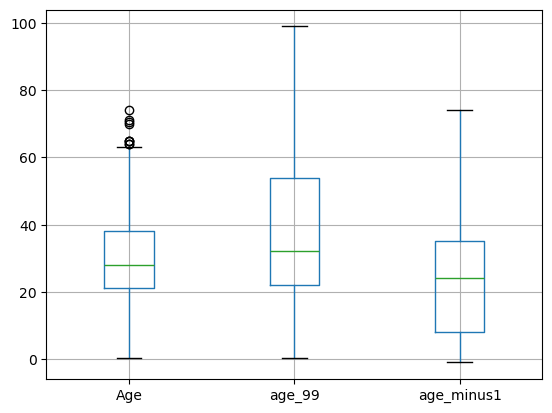

In [13]:
x_train[['Age','age_99','age_minus1']].boxplot()

<Axes: >

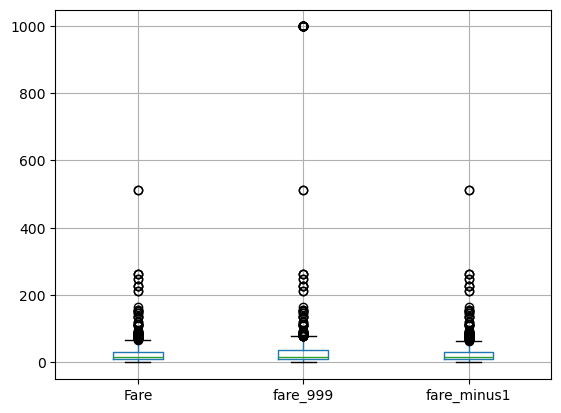

In [14]:
x_train[['Fare','fare_999','fare_minus1']].boxplot()

In [15]:
x_train.cov()

,Age,Fare,Family,age_99,age_minus1,fare_999,fare_minus1
Age,204.640030,73.932047,-6.163002,204.640030,204.640030,109.149514,68.808586
Fare,73.932047,2231.426717,14.881083,-87.485512,124.302490,2231.426717,2231.426717
Family,-6.163002,14.881083,2.492113,-7.745043,-3.715022,16.404182,14.070020
age_99,204.640030,-87.485512,-7.745043,922.509526,-171.506709,-99.196013,-82.626020
age_minus1,204.640030,124.302490,-3.715022,-171.506709,313.335829,170.545792,116.417602
fare_999,109.149514,2231.426717,16.404182,-99.196013,170.545792,46185.461601,661.841668
fare_minus1,68.808586,2231.426717,14.070020,-82.626020,116.417602,661.841668,2169.346891


In [16]:
x_train.corr()

,Age,Fare,Family,age_99,age_minus1,fare_999,fare_minus1
Age,1.000000,0.100835,-0.287786,1.000000,1.000000,0.035177,0.095714
Fare,0.100835,1.000000,0.197791,-0.060819,0.148268,1.000000,1.000000
Family,-0.287786,0.197791,1.000000,-0.161530,-0.132945,0.048352,0.191358
age_99,1.000000,-0.060819,-0.161530,1.000000,-0.319000,-0.015197,-0.058407
age_minus1,1.000000,0.148268,-0.132945,-0.319000,1.000000,0.044832,0.141205
fare_999,0.035177,1.000000,0.048352,-0.015197,0.044832,1.000000,0.066121
fare_minus1,0.095714,1.000000,0.191358,-0.058407,0.141205,0.066121,1.000000


### by sklearn

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y)
x_train.shape,x_test.shape

((668, 3), (223, 3))

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
impute_age = SimpleImputer(strategy='constant',fill_value=99)
impute_fare = SimpleImputer(strategy='constant',fill_value=-1)

trf = ColumnTransformer([
    ('trf1',impute_age,['Age']),
    ('trf2',impute_fare,['Fare'])
])

x_train_imputed = trf.fit_transform(x_train)
x_test_imputed = trf.transform(x_test)

In [19]:
x_train_imputed

array([[99.    , 15.5   ],
       [36.    , 17.4   ],
       [23.    ,  7.8958],
       ...,
       [44.    , 26.    ],
       [32.    , 13.    ],
       [33.    ,  7.8958]])